## Video 39


 What is a regression problem?
 - predict something out of the data, the question is not a yes or no question, but a number. So the solution might be, the thing on that image is a cat for about 75%.
  - Questions like: How much, how many, how ... can be answered with regression.

## Video 40


What kind of data is needed for a regression problem?
Ok some kind of data what you think are relevant to predict the answer from the neural network.

The way data has to be converted for a nn is for example the one hot encoding. So this means you create a list as long as all possible interpretations the data can have.
Is the data a cat or a dog or a mouse? One-Hot list maybe [0,1,0] for a dog.

This interpretation is also called a feature encoding and data representation.
1. Categorical Data Encoding
    - One-Hot Encoding: Converts categorical variables into binary vectors.
    - Label Encoding: Assigns each category a unique integer.
    - Ordinal Encoding: Like label encoding, but assumes an order in the categories.
    - Binary Encoding: Converts category indices to binary and stores them in multiple bits.
    - Target Encoding (Mean Encoding): Replaces categories with the mean of the target variable (useful for supervised learning).
2. Numerical Data Scaling & Normalization
    - Min-Max Scaling: Rescales values between 0 and 1.
    - Standardization (Z-score normalization): Centers values around 0 with unit variance.
    - Log Transformation: Used for skewed distributions.
    - Quantile Transformation: Maps data to a normal distribution.
3. Text Data Encoding
    - Bag of Words (BoW): Counts word occurrences.
    - TF-IDF (Term Frequency-Inverse Document Frequency): Adjusts word importance based on frequency across documents.
    - Word Embeddings (Word2Vec, GloVe, FastText): Maps words to dense vector spaces.
    - Character-Level Encoding: Similar to word embeddings, but on a character level.
4. Image Data Encoding
    - Raw Pixel Values: Direct input of pixel intensities.
    - Normalized Pixel Values: Pixels scaled to a range (e.g., 0-1 or -1 to 1).
    - Feature Extraction (HOG, SIFT, CNNs): Extracts meaningful features instead of raw pixels.
5. Graph Data Encoding
    - Adjacency Matrix Encoding: Represents connections between nodes as a matrix.
    - Graph Embeddings (Node2Vec, GCNs): Maps nodes to vector spaces.
6. Time Series & Sequential Data Encoding
    - Sliding Windows: Transforms time series into overlapping windows for learning.
    - Fourier Transform / Wavelet Transform: Extracts frequency-domain features.
    - Lag Features: Uses past values as inputs.



## Video 41

Architectures of Neural Networks
1. Feedforward Neural Networks (FNNs)
    - Basic neural network architecture
    - No feedback loops between neurons
    - Used for regression and classification tasks.
    - Variants
        - Single-layer perceptron: One layer of input nodes and one layer of output nodes, no hidden layers.
        - Multi-layer perceptron: Contains one or more hidden layers between the input and output layers.
2. Convolutional Neural Networks (CNNs)
    - Specialized for image data
    - Contains convolutional layers for feature extraction
        - Convolutional layers: Apply filters to input data to detect patterns.
        - Pooling layers: Reduce spatial dimensions of the data.
        - Fully connected layers: Perform classification based on extracted features.
    - Used for image classification, object detection, and segmentation tasks.
3. Recurrent Neural Networks (RNNs)
4. Transformer Neural Networks
5. Autoencoder Neural Networks
6. Generative Adversarial Networks (GANs)
7. Graph Neural Networks (GNNs)
8. Spike Neural Networks
9. etc.



## Video 42

**Definition of a regression problem:**
Method of the smallest absolute deviation ...

In [143]:
import os
import numpy
from fontTools.subset.svg import xpath

In [144]:
# disable the NUMA warning/support
# import os
# from cProfile import label

# from keras.src.backend import shape
# from keras.src.backend.jax.core import unstack

os.environ['TF_NUMA_ENABLED'] = '0'

In [145]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as ks
# import keras as ks
import os
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('absl').setLevel(logging.ERROR)

# print(tf.__version__)

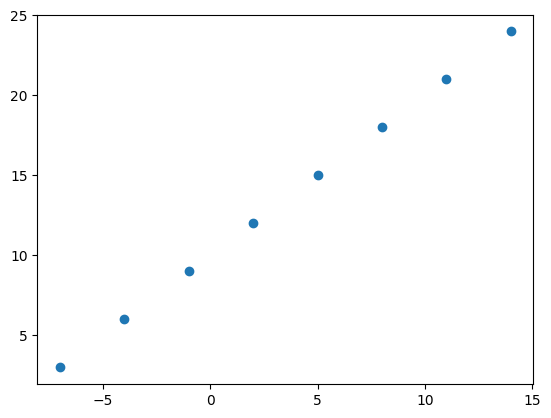

In [146]:
# create some data for first regression example

x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(x, y)

In [147]:
# check the pattern in the data idea
x + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [148]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [149]:
# example of housing info, video example
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

in this example the house_info has  the shape of 3 and the house_price has the shape of 1.
So what wr are trying to do is to make conclusions of the house_price out of the house_info.

## Video 44



In [150]:
# turn numpy arrays into tensors
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [151]:
input_shape_x = x[0].shape
input_shape_y = y[0].shape
input_shape_x, input_shape_y

(TensorShape([]), TensorShape([]))

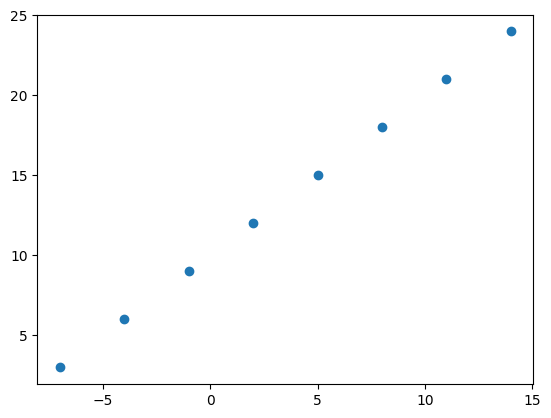

In [152]:
plt.scatter(x, y)

## Start modelling with TensorFlow

1. Create a model: define input layer and hidden layers and output layer
2. Compile a model: define the loss function and the optimizer
3. Fit a model: let the model find patterns between X and y
4. Evaluate a model: check how well the model is doing

In [153]:
# x = tf.cast(x, dtype=tf.float32)
# y = tf.cast(y, dtype=tf.float32)# set random seed

tf.random.set_seed(42)

# 1. create a model
model = ks.Sequential()
model.add(ks.layers.Input(shape=(1,)))
model.add(ks.layers.Dense(1))

# 2. compile the model
model.compile(loss=ks.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(x, y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 137ms/step - loss: 9.1083 - mae: 9.1083
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 8.9758 - mae: 8.9758
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 8.8433 - mae: 8.8433
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 8.7108 - mae: 8.7108
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 8.5783 - mae: 8.5783


2025-03-21 13:36:15.914277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [154]:
x.dtype, y.dtype

(tf.float64, tf.float64)

In [155]:
x = tf.cast(x, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)
x.dtype, y.dtype

(tf.float32, tf.float32)

In [156]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [157]:
# 3. fit the model
type(x), type(y)

(tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor)

In [158]:
model.fit(x, y, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 99ms/step - loss: 8.4458 - mae: 8.4458
Epoch 2/20
1/1 [==============================] - 0s 6ms/step - loss: 8.3133 - mae: 8.3133
Epoch 3/20
1/1 [==============================] - 0s 6ms/step - loss: 8.1808 - mae: 8.1808
Epoch 4/20
1/1 [==============================] - 0s 6ms/step - loss: 8.0483 - mae: 8.0483
Epoch 5/20
1/1 [==============================] - 0s 6ms/step - loss: 7.9158 - mae: 7.9158
Epoch 6/20
1/1 [==============================] - 0s 6ms/step - loss: 7.7833 - mae: 7.7833
Epoch 7/20
1/1 [==============================] - 0s 6ms/step - loss: 7.6508 - mae: 7.6508
Epoch 8/20
1/1 [==============================] - 0s 6ms/step - loss: 7.5183 - mae: 7.5183
Epoch 9/20
1/1 [==============================] - 0s 6ms/step - loss: 7.4025 - mae: 7.4025
Epoch 10/20
1/1 [==============================] - 0s 6ms/step - loss: 7.3969 - mae: 7.3969
Epoch 11/20
1/1 [==============================] - 0s 6ms/step - loss: 7.3913 - mae: 7.3

2025-03-21 13:36:16.248160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [159]:
try_1 = tf.constant([17.0])
try_1

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([17.], dtype=float32)>

In [160]:
pred_1 = model.predict(try_1)
pred_1

1/1 [==============================] - 0s 23ms/step


2025-03-21 13:36:16.524954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[29.285955]], dtype=float32)

In [161]:
type(pred_1)

numpy.ndarray

In [162]:
X_test = tf.constant([17, 20, 23, 26, 29, 31, 34, 37], dtype=tf.float32, shape=(8,))
predict = tf.cast(model.predict(X_test), dtype=tf.float32)
predict = tf.reshape(predict, shape=(8,))
X_test, predict

1/1 [==============================] - 0s 21ms/step


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([17., 20., 23., 26., 29., 31., 34., 37.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([29.285955, 34.415245, 39.54453 , 44.673817, 49.8031  , 53.222626,
        58.351913, 63.481197], dtype=float32)>)

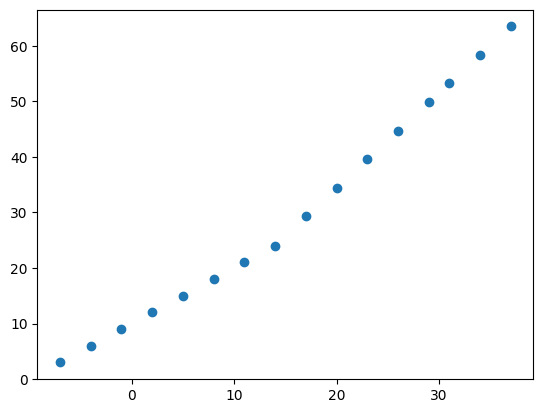

In [163]:
x_all = tf.concat([x, X_test], axis=0)
y_all = tf.concat([y, predict], axis=0)
plt.scatter(x_all, y_all)

In [164]:
def concat_pred_and_print(x_test: list, x, y, model):
    test = tf.cast(x_test, dtype=tf.float32)

    test_predict = model.predict(test)
    test_reshape = tf.reshape(test_predict, shape=(len(x_test),))

    x_all = tf.concat([x, test], axis=0)
    y_all = tf.concat([y, test_reshape], axis=0)
    plt.scatter(x_all, y_all)

1/1 [==============================] - 0s 18ms/step


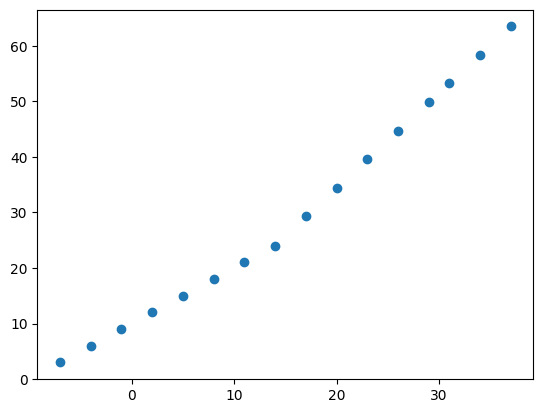

In [165]:
concat_pred_and_print([17, 20, 23, 26, 29, 31, 34, 37], x, y, model)

## Video 45

Optimierung des Modells

Idea, test to shuffle the learn data

In [166]:
stacked = tf.stack([x, y], axis=1)
stacked

<tf.Tensor: shape=(8, 2), dtype=float32, numpy=
array([[-7.,  3.],
       [-4.,  6.],
       [-1.,  9.],
       [ 2., 12.],
       [ 5., 15.],
       [ 8., 18.],
       [11., 21.],
       [14., 24.]], dtype=float32)>

In [167]:
shuffled = tf.random.shuffle(stacked)
shuffled

<tf.Tensor: shape=(8, 2), dtype=float32, numpy=
array([[14., 24.],
       [-1.,  9.],
       [-7.,  3.],
       [ 5., 15.],
       [ 2., 12.],
       [-4.,  6.],
       [ 8., 18.],
       [11., 21.]], dtype=float32)>

In [168]:
x, y = tf.unstack(shuffled, axis=1)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([14., -1., -7.,  5.,  2., -4.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([24.,  9.,  3., 15., 12.,  6., 18., 21.], dtype=float32)>)

In [169]:
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 19ms/step - loss: 7.3350 - mae: 7.3350
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 7.3294 - mae: 7.3294
Epoch 3/5
1/1 [==============================] - 0s 32ms/step - loss: 7.3237 - mae: 7.3237
Epoch 4/5
1/1 [==============================] - 0s 30ms/step - loss: 7.3181 - mae: 7.3181
Epoch 5/5
1/1 [==============================] - 0s 33ms/step - loss: 7.3125 - mae: 7.3125


1/1 [==============================] - 0s 16ms/step


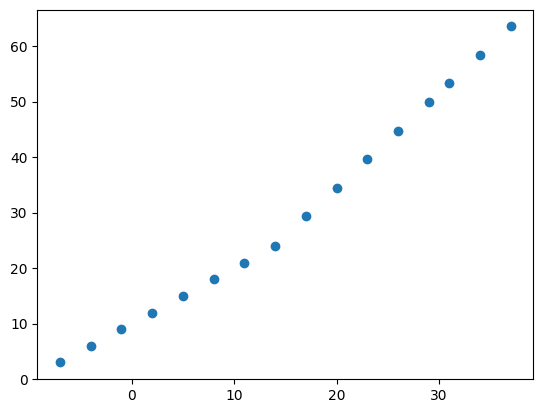

In [170]:
concat_pred_and_print([17, 20, 23, 26, 29, 31, 34, 37], x, y, model)

In [174]:
x = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0], dtype=tf.float32) # 17, 20
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0], dtype=tf.float32) # 27, 30

# 1. create a model
model = ks.Sequential()
model.add(ks.layers.Input(shape=(1,)))
model.add(ks.layers.Dense(100,  activation='relu'))
model.add(ks.layers.Dense(100, activation='relu'))
model.add(ks.layers.Dense(100, activation='relu'))
model.add(ks.layers.Dense(1, activation='relu'))

# 2. compile the model
model.compile(loss=ks.losses.MAE,
              optimizer=ks.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

# 3. fit the model
model.fit(x, y, epochs=40)

Epoch 1/40


2025-03-21 13:39:45.838963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 14.8606 - mae: 14.8606
Epoch 2/40
1/1 [==============================] - 0s 12ms/step - loss: 15.5330 - mae: 15.5330
Epoch 3/40
1/1 [==============================] - 0s 12ms/step - loss: 15.9283 - mae: 15.9283
Epoch 4/40
1/1 [==============================] - 0s 11ms/step - loss: 16.1290 - mae: 16.1290
Epoch 5/40
1/1 [==============================] - 0s 12ms/step - loss: 16.2054 - mae: 16.2054
Epoch 6/40
1/1 [==============================] - 0s 13ms/step - loss: 16.1931 - mae: 16.1931
Epoch 7/40
1/1 [==============================] - 0s 12ms/step - loss: 16.1163 - mae: 16.1163
Epoch 8/40
1/1 [==============================] - 0s 10ms/step - loss: 15.9880 - mae: 15.9880
Epoch 9/40
1/1 [==============================] - 0s 14ms/step - loss: 15.8187 - mae: 15.8187
Epoch 10/40
1/1 [==============================] - 0s 14ms/step - loss: 15.6151 - mae: 15.6151
Epoch 11/40
1/1 [==============================] - 0s 21ms/step - loss: 

Optimizers
- Stochastic Gradient Descent (SGD): Updates weights based on the gradient of the loss function.
- Adam: Adaptive Moment Estimation, combines the advantages of RMSprop and momentum.
- RMSprop: Divides the learning rate by the moving average of the root mean square of the gradients.
- Adagrad: Adapts the learning rate to the parameters.
- Adadelta: Extends Adagrad to reduce aggressive, monotonically decreasing learning rates.
- Adamax: Generalization of Adam based on the infinity norm.
- Nadam: Adam with Nesterov momentum.
- FTRL: Follow the regularized leader optimizer.

In [176]:
x_test = tf.constant([17.0, 20.0, 23.0, 26.0, 29.0, 31.0, 34.0, 37.0], dtype=tf.float32, shape=(8,))
y_test = tf.constant([27.0, 30.0, 33.0, 36.0, 39.0, 42.0, 45.0, 48.0], dtype=tf.float32)
x_test, y_test

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([17., 20., 23., 26., 29., 31., 34., 37.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([27., 30., 33., 36., 39., 42., 45., 48.], dtype=float32)>)

## Video 48

Visualize, Visualize, Visualize

In [177]:
x1_generated = [-7.0 + i*3 for i in range(100)]
y1_generated = [3.0 + i*3 for i in range(100)]
stack = tf.stack([x1_generated, y1_generated], axis=1)
stack

<tf.Tensor: shape=(100, 2), dtype=float32, numpy=
array([[ -7.,   3.],
       [ -4.,   6.],
       [ -1.,   9.],
       [  2.,  12.],
       [  5.,  15.],
       [  8.,  18.],
       [ 11.,  21.],
       [ 14.,  24.],
       [ 17.,  27.],
       [ 20.,  30.],
       [ 23.,  33.],
       [ 26.,  36.],
       [ 29.,  39.],
       [ 32.,  42.],
       [ 35.,  45.],
       [ 38.,  48.],
       [ 41.,  51.],
       [ 44.,  54.],
       [ 47.,  57.],
       [ 50.,  60.],
       [ 53.,  63.],
       [ 56.,  66.],
       [ 59.,  69.],
       [ 62.,  72.],
       [ 65.,  75.],
       [ 68.,  78.],
       [ 71.,  81.],
       [ 74.,  84.],
       [ 77.,  87.],
       [ 80.,  90.],
       [ 83.,  93.],
       [ 86.,  96.],
       [ 89.,  99.],
       [ 92., 102.],
       [ 95., 105.],
       [ 98., 108.],
       [101., 111.],
       [104., 114.],
       [107., 117.],
       [110., 120.],
       [113., 123.],
       [116., 126.],
       [119., 129.],
       [122., 132.],
       [125., 135.],
     

In [180]:
x1, y1 = tf.unstack(stack, axis=1)

model1 = ks.Sequential()
model1.add(ks.layers.Input(shape=(1,)))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(1))

# 2. compile the model
model1.compile(loss=ks.losses.MAE,
              optimizer=ks.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model1.fit(x1, y1, epochs=100)

Epoch 1/100


2025-03-21 13:41:17.229038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 266ms/step - loss: 194.3825 - mae: 194.3825
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 190.4517 - mae: 190.4517
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 181.7684 - mae: 181.7684
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 173.7532 - mae: 173.7532
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 166.4778 - mae: 166.4778
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 159.1253 - mae: 159.1253
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 152.4181 - mae: 152.4181
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 145.5865 - mae: 145.5865
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 135.3255 - mae: 135.3255
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 118.6685 - mae: 118.6685
Epoch 11/100
4/4 [==============================]

In [181]:
a = np.arange(0, 9, 0.3)
model1.predict(a)

2025-03-21 13:41:26.573274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 299ms/step


array([[ 1.8474083],
       [ 2.1430507],
       [ 2.438694 ],
       [ 2.7343416],
       [ 3.0299902],
       [ 3.3256254],
       [ 3.6212683],
       [ 3.9169264],
       [ 4.212558 ],
       [ 4.5082197],
       [ 4.8038435],
       [ 5.099498 ],
       [ 5.3951445],
       [ 5.690791 ],
       [ 5.9864225],
       [ 6.2820463],
       [ 6.577716 ],
       [ 6.87337  ],
       [ 7.168994 ],
       [ 7.4646177],
       [ 7.760272 ],
       [ 8.055926 ],
       [ 8.351565 ],
       [ 8.647143 ],
       [ 8.942874 ],
       [ 9.238467 ],
       [ 9.534137 ],
       [ 9.829791 ],
       [10.125445 ],
       [10.420978 ]], dtype=float32)

In [182]:
a = np.arange(0, 30, 3)
a_test = np.arange(30, 60, 3)
b = np.arange(-7, 23, 3)
b_test = np.arange(23, 51, 3)
a, b, a_test, b_test

(array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27]),
 array([-7, -4, -1,  2,  5,  8, 11, 14, 17, 20]),
 array([30, 33, 36, 39, 42, 45, 48, 51, 54, 57]),
 array([23, 26, 29, 32, 35, 38, 41, 44, 47, 50]))

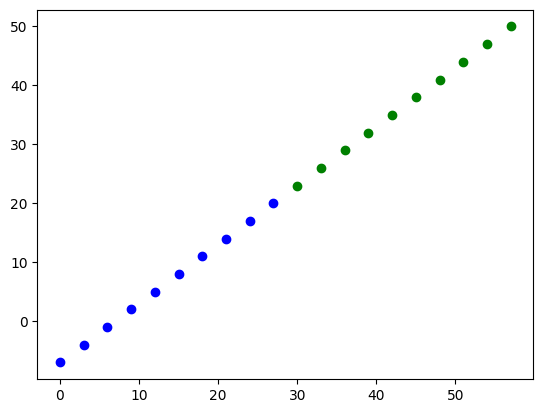

In [183]:
plt.scatter(a, b, c='blue')
plt.scatter(a_test, b_test, c='green')

## creating extra data for learning

In [185]:
a_extend = []
b_extend = []
for i, j in zip(a, b):
    a_extend.append(i-0.02)
    a_extend.append(i-0.01)
    a_extend.append(i-0.2)
    a_extend.append(i-0.1)
    a_extend.append(i)
    a_extend.append(i+0.01)
    a_extend.append(i+0.02)
    a_extend.append(i+0.1)
    a_extend.append(i+0.2)
    b_extend.append(j-0.02)
    b_extend.append(j-0.01)
    b_extend.append(j-0.2)
    b_extend.append(j-0.1)
    b_extend.append(j)
    b_extend.append(j+0.01)
    b_extend.append(j+0.02)
    b_extend.append(j+0.1)
    b_extend.append(j+0.2)
a_extend, b_extend

([-0.02,
  -0.01,
  -0.2,
  -0.1,
  0,
  0.01,
  0.02,
  0.1,
  0.2,
  2.98,
  2.99,
  2.8,
  2.9,
  3,
  3.01,
  3.02,
  3.1,
  3.2,
  5.98,
  5.99,
  5.8,
  5.9,
  6,
  6.01,
  6.02,
  6.1,
  6.2,
  8.98,
  8.99,
  8.8,
  8.9,
  9,
  9.01,
  9.02,
  9.1,
  9.2,
  11.98,
  11.99,
  11.8,
  11.9,
  12,
  12.01,
  12.02,
  12.1,
  12.2,
  14.98,
  14.99,
  14.8,
  14.9,
  15,
  15.01,
  15.02,
  15.1,
  15.2,
  17.98,
  17.99,
  17.8,
  17.9,
  18,
  18.01,
  18.02,
  18.1,
  18.2,
  20.98,
  20.99,
  20.8,
  20.9,
  21,
  21.01,
  21.02,
  21.1,
  21.2,
  23.98,
  23.99,
  23.8,
  23.9,
  24,
  24.01,
  24.02,
  24.1,
  24.2,
  26.98,
  26.99,
  26.8,
  26.9,
  27,
  27.01,
  27.02,
  27.1,
  27.2],
 [-7.02,
  -7.01,
  -7.2,
  -7.1,
  -7,
  -6.99,
  -6.98,
  -6.9,
  -6.8,
  -4.02,
  -4.01,
  -4.2,
  -4.1,
  -4,
  -3.99,
  -3.98,
  -3.9,
  -3.8,
  -1.02,
  -1.01,
  -1.2,
  -1.1,
  -1,
  -0.99,
  -0.98,
  -0.9,
  -0.8,
  1.98,
  1.99,
  1.8,
  1.9,
  2,
  2.01,
  2.02,
  2.1,
  2.2,
  4.

In [188]:


model3 = ks.Sequential()
model3.add(ks.layers.Input(shape=(1,)))
model3.add(ks.layers.Dense(20, activation='relu'))
model3.add(ks.layers.Dense(20, activation='relu'))
model3.add(ks.layers.Dense(20, activation='relu'))
model3.add(ks.layers.Dense(1))

# 2. compile the model
model3.compile(loss=ks.losses.MAE,
              optimizer=ks.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model3.fit(a_extend, b_extend, epochs=90)

Epoch 1/90
1/3 [=========>....................] - ETA: 0s - loss: 3.5362 - mae: 3.5362

2025-03-21 13:50:23.081780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 268ms/step - loss: 3.2865 - mae: 3.2865
Epoch 2/90
3/3 [==============================] - 0s 8ms/step - loss: 3.2078 - mae: 3.2078
Epoch 3/90
3/3 [==============================] - 0s 8ms/step - loss: 3.3906 - mae: 3.3906
Epoch 4/90
3/3 [==============================] - 0s 7ms/step - loss: 3.2748 - mae: 3.2748
Epoch 5/90
3/3 [==============================] - 0s 7ms/step - loss: 3.1073 - mae: 3.1073
Epoch 6/90
3/3 [==============================] - 0s 7ms/step - loss: 3.0286 - mae: 3.0286
Epoch 7/90
3/3 [==============================] - 0s 8ms/step - loss: 3.0355 - mae: 3.0355
Epoch 8/90
3/3 [==============================] - 0s 7ms/step - loss: 3.0261 - mae: 3.0261
Epoch 9/90
3/3 [==============================] - 0s 6ms/step - loss: 3.0027 - mae: 3.0027
Epoch 10/90
3/3 [==============================] - 0s 6ms/step - loss: 2.9914 - mae: 2.9914
Epoch 11/90
3/3 [==============================] - 0s 6ms/step - loss: 2.9728 - mae: 2.9728
Epoch 

In [189]:
b_extend_predict = model3.predict(a_test)
b_extend_predict

2025-03-21 13:50:30.757376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 304ms/step


array([[22.918259],
       [25.909616],
       [28.900974],
       [31.892328],
       [34.883694],
       [37.87505 ],
       [40.866417],
       [43.857773],
       [46.849136],
       [49.8405  ]], dtype=float32)

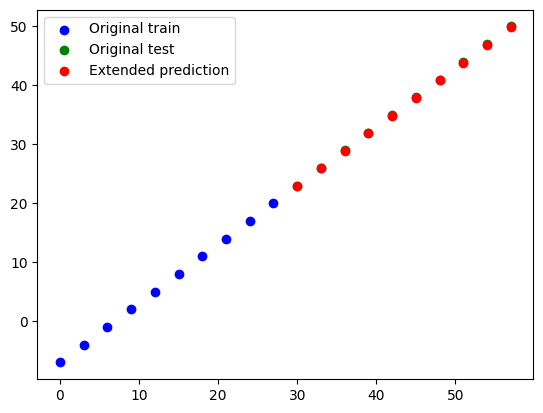

In [190]:
# plt.figure(figsize=(10, 7))
plt.scatter(a, b, c='blue', label='Original train')
plt.scatter(a_test, b_test, c='green', label='Original test')
plt.scatter(a_test, b_extend_predict, c='red', label='Extended prediction')
# plt.scatter(a_test, b_predict, c='yellow', label='Original prediction')
plt.legend()

removing a little bit and adding a little bit generates much more data for learning. This is a good way to generate more data for learning. This is called data augmentation. (really, just invented it for myself)

how are tricks like this called in the real world copilot? Data augmentation, data preprocessing, data cleaning, data wrangling, data transformation

### Welche Optimizer gibt es?
- Stochastic Gradient Descent (SGD): Updates weights based on the gradient of the loss function.
- Adam: Adaptive Moment Estimation, combines the advantages of RMSprop and momentum.
- RMSprop: Divides the learning rate by the moving average of the root mean square of the gradients.

### Welche Activation funktionen gibt es?
- ReLU
- Sigmoid
- Tanh

Testing summary and building a nn

In [191]:
model4 = ks.Sequential()
model4.add(ks.layers.Input(shape=(1,)))
model4.add(ks.layers.Dense(20, activation='relu'))
model4.add(ks.layers.Dense(20, activation='relu'))
model4.add(ks.layers.Dense(20, activation='relu'))
model4.add(ks.layers.Dense(1))

# 2. compile the model
model4.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
# model3.fit(a_extend, b_extend, epochs=90)

In [192]:
model4.build()

In [193]:
model4.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 20)                40        
                                                                 
 dense_88 (Dense)            (None, 20)                420       
                                                                 
 dense_89 (Dense)            (None, 20)                420       
                                                                 
 dense_90 (Dense)            (None, 1)                 21        
                                                                 
Total params: 901 (3.52 KB)
Trainable params: 901 (3.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Total params sind die neuronen welche träiniert werden können
trainable sind diese die ihre werte verändern können
non trainable, analag dazu.. sind häufig bereits gelernte implementierte nn die in das nn integriert worden sind